<a href="https://colab.research.google.com/github/Darrenn231/DeepLearning/blob/main/Deep_Learning_no_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

link video:https://drive.google.com/drive/folders/1Vb0dU0qfdRvvvHSrJUHxYX0R8a8H3v2b?usp=sharing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("X.csv")

# Data Exploration


In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,2.676384e+13,304.904572,76180670.0
1,2005-09-30,457.787384,457.787384,432.588074,2.832264e+13,322.666016,105493978.0
2,2005-10-03,470.387024,474.586914,440.987854,2.910204e+13,331.546692,59712955.0
3,2005-10-04,474.586914,482.986694,466.187164,2.936184e+13,334.506927,56236668.0
4,2005-10-05,482.986694,482.986694,466.187164,2.988143e+13,340.427429,31319315.0


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3803,2021-01-28,2470.0,2570.0,2380.0,1.472283e+14,2380.0,7.318549e+08
3804,2021-01-29,2370.0,2440.0,2220.0,1.373309e+14,2220.0,4.503212e+08
3805,2021-02-01,2090.0,2640.0,2070.0,1.608372e+14,2600.0,2.186653e+09
3806,2021-02-02,2600.0,2630.0,2420.0,1.497026e+14,2420.0,9.424343e+08
3807,2021-02-03,2390.0,2520.0,2290.0,1.441353e+14,2330.0,9.480310e+08


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3808 non-null   object 
 1   Open       3807 non-null   float64
 2   High       3807 non-null   float64
 3   Low        3807 non-null   float64
 4   Close      3807 non-null   float64
 5   Adj Close  3807 non-null   float64
 6   Volume     3807 non-null   float64
dtypes: float64(6), object(1)
memory usage: 208.4+ KB


In [ ]:
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

There are missing values in the dataset, since there is only one row of missing values therefore drop the row

In [ ]:
data.dropna(axis=0, inplace=True)
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

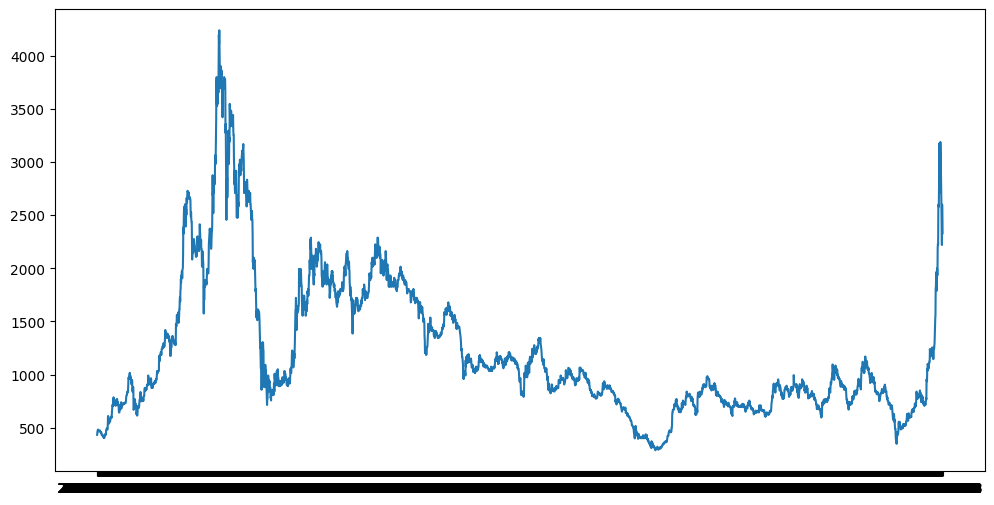

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.show()

The graph shows the value of Close as the Date changes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,0.036812,304.904572,7.618067e+07
1,2005-09-30,457.787384,457.787384,432.588074,0.043184,322.666016,1.054940e+08
2,2005-10-03,470.387024,474.586914,440.987854,0.046370,331.546692,5.971296e+07
3,2005-10-04,474.586914,482.986694,466.187164,0.047432,334.506927,5.623667e+07
4,2005-10-05,482.986694,482.986694,466.187164,0.049556,340.427429,3.131932e+07
...,...,...,...,...,...,...,...
3803,2021-01-28,2470.000000,2570.000000,2380.000000,0.529219,2380.000000,7.318549e+08
3804,2021-01-29,2370.000000,2440.000000,2220.000000,0.488763,2220.000000,4.503212e+08
3805,2021-02-01,2090.000000,2640.000000,2070.000000,0.584847,2600.000000,2.186653e+09
3806,2021-02-02,2600.000000,2630.000000,2420.000000,0.539333,2420.000000,9.424343e+08


Transform the close values in between [0,1]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 3807
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3807 non-null   object 
 1   Open       3807 non-null   float64
 2   High       3807 non-null   float64
 3   Low        3807 non-null   float64
 4   Close      3807 non-null   float64
 5   Adj Close  3807 non-null   float64
 6   Volume     3807 non-null   float64
dtypes: float64(6), object(1)
memory usage: 237.9+ KB


In [ ]:
# Set 'Date' as the index
data.set_index('Date', inplace=True)


# Function to create input-output pairs with specified window size and horizon
def create_time_series_data(data, window_size=5, horizon=1):
    input_segments, output_segments = [], []

    for i in range(len(data) - window_size - horizon + 1):
        input_segment = data.iloc[i:i+window_size]
        output_segment = data.iloc[i+window_size:i+window_size+horizon]

        input_segments.append(input_segment.values)
        output_segments.append(output_segment.values)

    return np.array(input_segments), np.array(output_segments)

# Create input-output pairs
window_size = 5
horizon = 1
X, y = create_time_series_data(data[['Close']], window_size, horizon)

X = X.reshape(-1, window_size, 1)

# Display the shapes of the input and output segments
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (3802, 5, 1)
Output shape: (3802, 1, 1)


# Splitting Data (80:10:10)

In [ ]:
from sklearn.model_selection import train_test_split


data = data.sort_values(by='Date')

# Split the data using train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.8, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)


print("Training set shapes - X: {}, y: {}".format(X_train.shape, y_train.shape))
print("Validation set shapes - X: {}, y: {}".format(X_val.shape, y_val.shape))
print("Test set shapes - X: {}, y: {}".format(X_test.shape, y_test.shape))

Training set shapes - X: (3041, 5, 1), y: (3041, 1, 1)
Validation set shapes - X: (380, 5, 1), y: (380, 1, 1)
Test set shapes - X: (381, 5, 1), y: (381, 1, 1)


# Modelling

base architecture

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, activation='relu', return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, activation='relu')),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(horizon)
])
model.build(input_shape=(None, window_size, 1))
model.compile(optimizer='adam', loss='mse', metrics = ['mean_absolute_error'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_15 (Bidirect  (None, 5, 256)            100608    
 ional)                                                          
                                                                 
 dropout_15 (Dropout)        (None, 5, 256)            0         
                                                                 
 bidirectional_16 (Bidirect  (None, 5, 128)            123648    
 ional)                                                          
                                                                 
 dropout_16 (Dropout)        (None, 5, 128)            0         
                                                                 
 bidirectional_17 (Bidirect  (None, 64)                31104     
 ional)                                                          
                                                      

In [ ]:
model1 = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
96/96 [==============================] - 17s 38ms/step - loss: 0.0104 - mean_absolute_error: 0.0573 - val_loss: 6.5341e-05 - val_mean_absolute_error: 0.0061
Epoch 2/50
96/96 [==============================] - 3s 29ms/step - loss: 8.8238e-04 - mean_absolute_error: 0.0194 - val_loss: 2.1898e-04 - val_mean_absolute_error: 0.0131
Epoch 3/50
96/96 [==============================] - 6s 58ms/step - loss: 7.9283e-04 - mean_absolute_error: 0.0188 - val_loss: 6.5929e-05 - val_mean_absolute_error: 0.0063
Epoch 4/50
96/96 [==============================] - 3s 29ms/step - loss: 7.7302e-04 - mean_absolute_error: 0.0183 - val_loss: 6.1487e-05 - val_mean_absolute_error: 0.0059
Epoch 5/50
96/96 [==============================] - 3s 28ms/step - loss: 6.1176e-04 - mean_absolute_error: 0.0167 - val_loss: 6.0059e-05 - val_mean_absolute_error: 0.0059
Epoch 6/50
96/96 [==============================] - 3s 29ms/step - loss: 6.5160e-04 - mean_absolute_error: 0.0171 - val_loss: 6.7762e-05 - val_mean_

Sequential Self-Attention Mechanism

In [ ]:
!pip install keras-self-attention

In [ ]:
from keras_self_attention import SeqSelfAttention
from keras.layers import MultiHeadAttention, Flatten
import tensorflow_addons as tfa

Attention_model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128, activation='relu', return_sequences=True, input_shape=(window_size, 1))),
    SeqSelfAttention(attention_activation='sigmoid'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, activation='relu', return_sequences=True)),
    SeqSelfAttention(attention_activation='sigmoid'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, activation='relu')),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(horizon)
])

Attention_model.build(input_shape=(None, 5, 1))
Attention_model.compile(optimizer='adam', loss='mse', metrics = ['mean_absolute_error'])


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Sequential Self-Attention Mechanism  weigh different parts of the input based on how relevant it is from one to the other.

In [ ]:
Attention_model1 = Attention_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
96/96 [==============================] - 15s 45ms/step - loss: 0.0088 - mean_absolute_error: 0.0551 - val_loss: 1.6916e-04 - val_mean_absolute_error: 0.0114
Epoch 2/50
96/96 [==============================] - 3s 32ms/step - loss: 0.0011 - mean_absolute_error: 0.0223 - val_loss: 8.0451e-04 - val_mean_absolute_error: 0.0272
Epoch 3/50
96/96 [==============================] - 5s 49ms/step - loss: 7.3543e-04 - mean_absolute_error: 0.0179 - val_loss: 8.0602e-05 - val_mean_absolute_error: 0.0070
Epoch 4/50
96/96 [==============================] - 3s 32ms/step - loss: 7.4817e-04 - mean_absolute_error: 0.0180 - val_loss: 3.7830e-04 - val_mean_absolute_error: 0.0178
Epoch 5/50
96/96 [==============================] - 3s 32ms/step - loss: 7.2260e-04 - mean_absolute_error: 0.0174 - val_loss: 8.2728e-05 - val_mean_absolute_error: 0.0074
Epoch 6/50
96/96 [==============================] - 3s 33ms/step - loss: 5.8681e-04 - mean_absolute_error: 0.0162 - val_loss: 2.8650e-04 - val_mean_abso

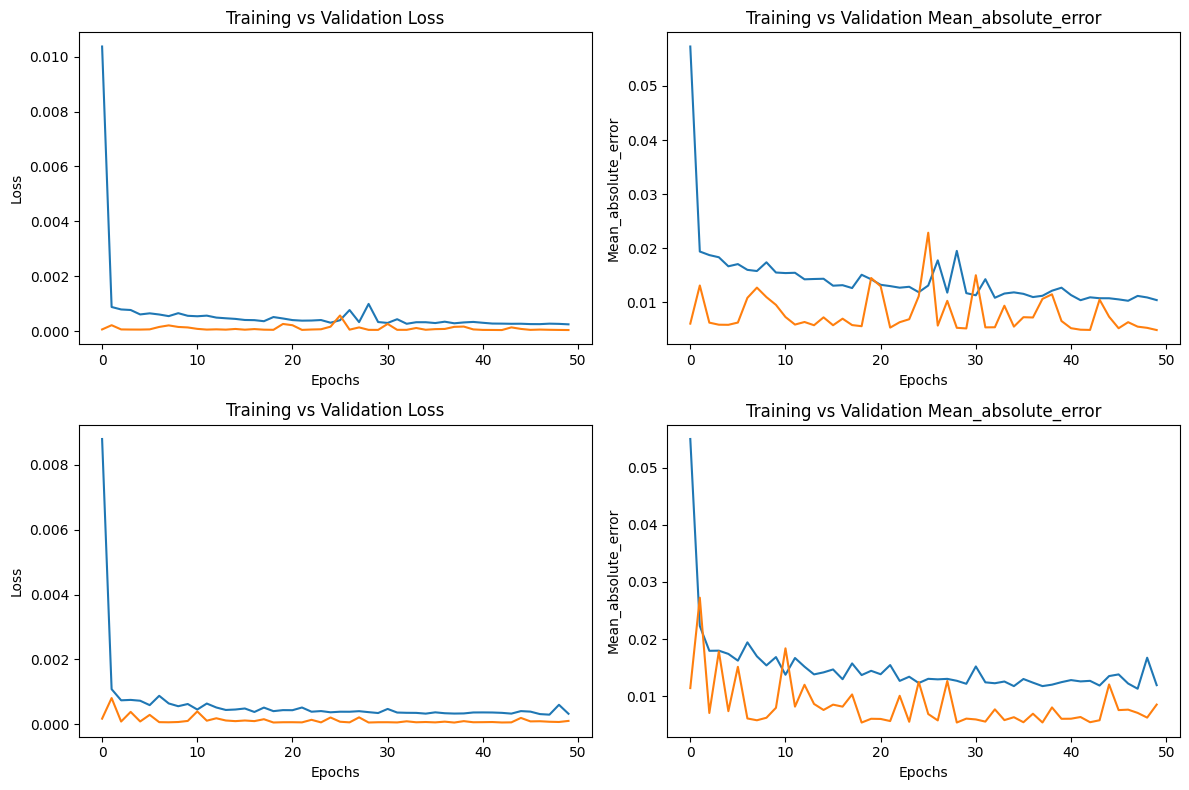

In [ ]:
def plot_metrics(ax, history, metric, label='Training'):
    ax.plot(history[metric], label=f'{label} {metric.capitalize()}')
    ax.plot(history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'Training vs Validation {metric.capitalize()}')

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

#first model
plot_metrics(ax[0, 0], model1.history, 'loss')
plot_metrics(ax[0, 1], model1.history, 'mean_absolute_error')

#second model
plot_metrics(ax[1, 0], Attention_model1.history, 'loss')
plot_metrics(ax[1, 1], Attention_model1.history, 'mean_absolute_error')

plt.tight_layout()
plt.show()


There are two types of loss function graph which are loss vs val_loss(MSE) and MAE vs val_MAE. These metrics are chosen to identify whether the model is learning from the training data. The model is learning from the training data when both loss and validation loss should decrease over time. Both models shows a good result staying level for the MSE loss vs val_loss graph. However, there is a large gap between MAE and val_MAE for both the model suggesting overfitting.


In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

12/12 [==============================] - 0s 7ms/step - loss: 4.2606e-04 - mean_absolute_error: 0.0111
Test Loss (MSE): [0.0004260590940248221, 0.011075995862483978]


In [ ]:
test_loss = Attention_model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss}')

12/12 [==============================] - 0s 23ms/step - loss: 3.9317e-04 - mean_absolute_error: 0.0130
Test Loss (MSE): [0.0003931709215976298, 0.013036832213401794]


test_loss value showing a very low value suggesting both model is good

In [ ]:
predict = model.predict(X_test)
predict = scaler.inverse_transform(predict)
predict

12/12 [==============================] - 0s 8ms/step


array([[ 888.9042 ],
       [ 918.202  ],
       [ 925.83386],
       [ 936.2859 ],
       [ 932.0031 ],
       [ 932.52423],
       [ 926.35095],
       [ 908.1301 ],
       [ 900.3079 ],
       [ 914.45135],
       [ 920.89545],
       [ 919.1979 ],
       [ 908.1044 ],
       [ 887.67694],
       [ 910.1324 ],
       [ 950.9684 ],
       [ 982.55023],
       [1019.30457],
       [1016.50446],
       [1031.4404 ],
       [1062.6228 ],
       [1079.6572 ],
       [1084.3691 ],
       [1068.7927 ],
       [1046.446  ],
       [1045.9241 ],
       [1030.1511 ],
       [1008.187  ],
       [1009.57697],
       [1004.6038 ],
       [1017.89294],
       [1025.3784 ],
       [1037.2133 ],
       [1103.347  ],
       [1086.5023 ],
       [1075.9698 ],
       [1073.824  ],
       [1059.942  ],
       [1077.5123 ],
       [1089.5543 ],
       [1090.563  ],
       [1088.5745 ],
       [1063.3915 ],
       [1043.8357 ],
       [1034.5364 ],
       [1037.9619 ],
       [1028.8755 ],
       [1035.

In [ ]:
Attention_predict = Attention_model.predict(X_test)
Attention_predict = scaler.inverse_transform(Attention_predict)
Attention_predict

12/12 [==============================] - 0s 25ms/step


array([[ 915.68146],
       [ 934.43164],
       [ 941.5995 ],
       [ 949.8086 ],
       [ 950.39886],
       [ 951.55865],
       [ 946.5124 ],
       [ 937.19366],
       [ 930.6452 ],
       [ 935.71893],
       [ 939.5695 ],
       [ 940.06366],
       [ 935.523  ],
       [ 922.4739 ],
       [ 931.91974],
       [ 954.9176 ],
       [ 992.38074],
       [1032.0697 ],
       [1040.2402 ],
       [1056.2325 ],
       [1085.4026 ],
       [1105.8552 ],
       [1115.4863 ],
       [1103.2374 ],
       [1079.1794 ],
       [1075.7417 ],
       [1059.6178 ],
       [1041.3817 ],
       [1038.3745 ],
       [1033.2693 ],
       [1042.2639 ],
       [1050.1168 ],
       [1061.8416 ],
       [1118.     ],
       [1117.4105 ],
       [1111.5992 ],
       [1108.6821 ],
       [1093.9468 ],
       [1108.0156 ],
       [1120.5782 ],
       [1124.5463 ],
       [1124.2489 ],
       [1099.4791 ],
       [1076.3043 ],
       [1064.2017 ],
       [1065.083  ],
       [1056.8016 ],
       [1062.

In [ ]:
df = pd.read_csv('X.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,7.618067e+07
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,1.054940e+08
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,5.971296e+07
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,5.623667e+07
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,3.131932e+07
...,...,...,...,...,...,...,...
3803,2021-01-28,2470.000000,2570.000000,2380.000000,2380.000000,2380.000000,7.318549e+08
3804,2021-01-29,2370.000000,2440.000000,2220.000000,2220.000000,2220.000000,4.503212e+08
3805,2021-02-01,2090.000000,2640.000000,2070.000000,2600.000000,2600.000000,2.186653e+09
3806,2021-02-02,2600.000000,2630.000000,2420.000000,2420.000000,2420.000000,9.424343e+08


In [ ]:
data['Close'] = scaler.inverse_transform(data[['Close']])
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,7.618067e+07
1,2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,1.054940e+08
2,2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,5.971296e+07
3,2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,5.623667e+07
4,2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,3.131932e+07
...,...,...,...,...,...,...,...
3803,2021-01-28,2470.000000,2570.000000,2380.000000,2380.000000,2380.000000,7.318549e+08
3804,2021-01-29,2370.000000,2440.000000,2220.000000,2220.000000,2220.000000,4.503212e+08
3805,2021-02-01,2090.000000,2640.000000,2070.000000,2600.000000,2600.000000,2.186653e+09
3806,2021-02-02,2600.000000,2630.000000,2420.000000,2420.000000,2420.000000,9.424343e+08


In [ ]:
y_true = np.array(data['Close'].tail(381))
y_true

array([ 950.,  940.,  960.,  940.,  945.,  930.,  890.,  895.,  935.,
        935.,  925.,  900.,  860.,  940., 1005., 1020., 1065., 1035.,
       1065., 1110., 1120., 1120., 1085., 1050., 1070., 1040., 1015.,
       1030., 1020., 1050., 1055., 1070., 1170., 1110., 1100., 1100.,
       1075., 1120., 1130., 1125., 1120., 1070., 1050., 1050., 1065.,
       1045., 1065., 1055., 1015., 1010., 1015.,  990.,  975.,  955.,
        920.,  965.,  960.,  955.,  930.,  990.,  995., 1015., 1000.,
        985.,  960.,  955.,  935.,  925.,  930.,  955.,  975.,  955.,
        915.,  925.,  930.,  890.,  855.,  840.,  835.,  850.,  845.,
        835.,  830.,  820.,  820.,  815.,  825.,  820.,  835.,  825.,
        815.,  810.,  815.,  810.,  780.,  750.,  750.,  790.,  775.,
        785.,  805.,  810.,  825.,  825.,  825.,  835.,  850.,  865.,
        860.,  830.,  835.,  830.,  825.,  840.,  835.,  840.,  840.,
        850.,  885.,  875.,  905.,  880.,  885.,  870.,  850.,  835.,
        845.,  840.,

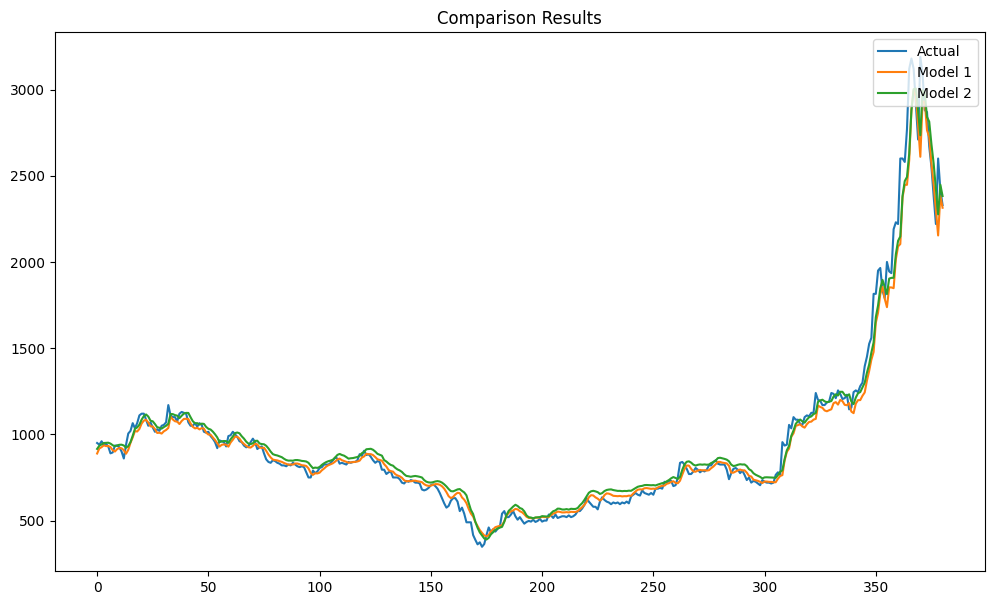

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(y_true, label='Actual')
plt.plot(predict, label='Model 1')
plt.plot(Attention_predict, label='Model 2')
plt.legend(loc='upper right')
plt.title('Comparison')
plt.show()